<a href="https://colab.research.google.com/github/gharis/Machine-Learning/blob/master/AccelerometerActivityRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization 
from tensorflow.keras.layers import Conv2D, MaxPool2D 
from tensorflow.keras.optimizers import Adam

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [0]:
##upload files to colab runtime folder
##https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

#from google.colab import files
#uploaded = files.upload()

In [0]:
##read files from colab runtime folder
##files wil delete from colab runtime folder once colab closed

#import io
#df2 = pd.read_csv(io.BytesIO(uploaded['WISDM_ar_v1.1_raw (1).txt']))

# Dataset is now stored in a Pandas Dataframe

In [0]:
file = open('WISDM_ar_v1.1_raw.txt')


In [14]:
lines = file.readlines()

processedList = []

for i, line in enumerate(lines):
  try:
      line = line.split(',')
      last = line[5].split(';')[0]
      last = last.strip()
      if last == "":
        break;
      temp = [line[0], line[1], line[2], line[3], line [4], last]
      processedList.append(temp)
  except:
      print('error at linenumber: ' , i)

error at linenumber:  281873
error at linenumber:  281874
error at linenumber:  281875


In [15]:
processedList 

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [0]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [18]:
data = pd.DataFrame(data = processedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [19]:
data.shape

(343416, 6)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [21]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [22]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [0]:
##data balancing

In [0]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343416 non-null  object 
 1   activity  343416 non-null  object 
 2   time      343416 non-null  object 
 3   x         343416 non-null  float64
 4   y         343416 non-null  float64
 5   z         343416 non-null  float64
dtypes: float64(3), object(3)
memory usage: 15.7+ MB


In [0]:
Fs = 20

In [0]:
activities = data['activity'].value_counts().index

In [28]:
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

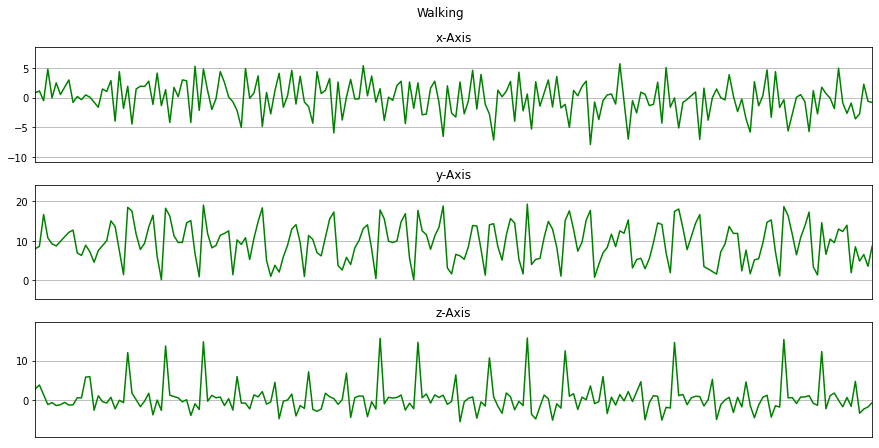

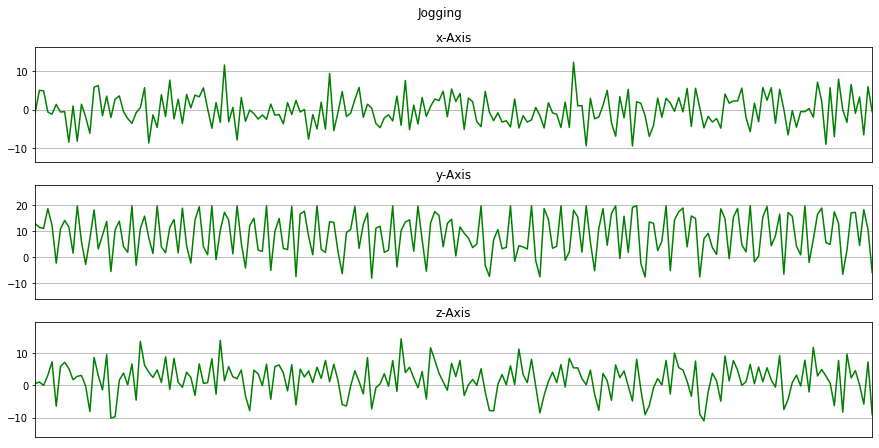

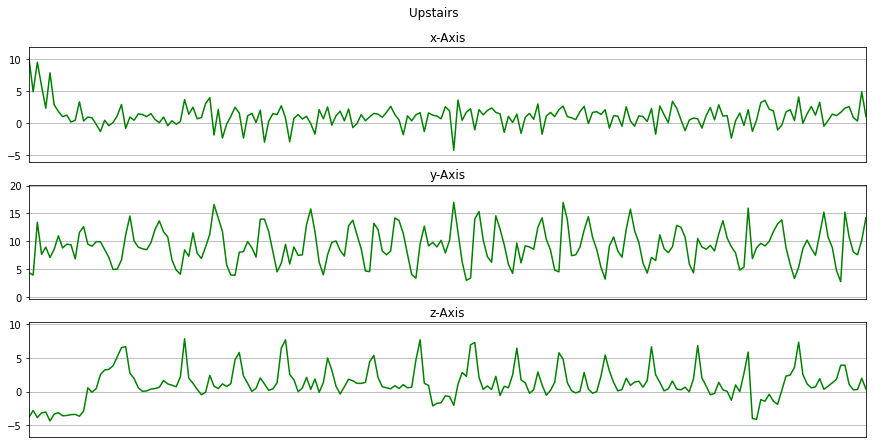

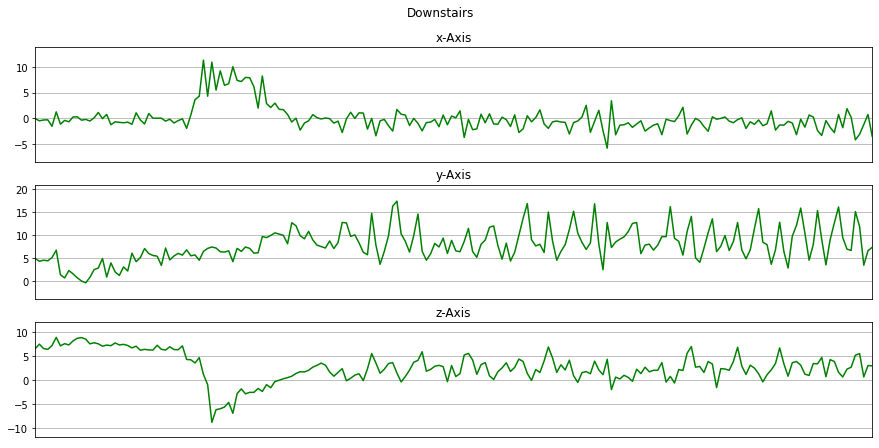

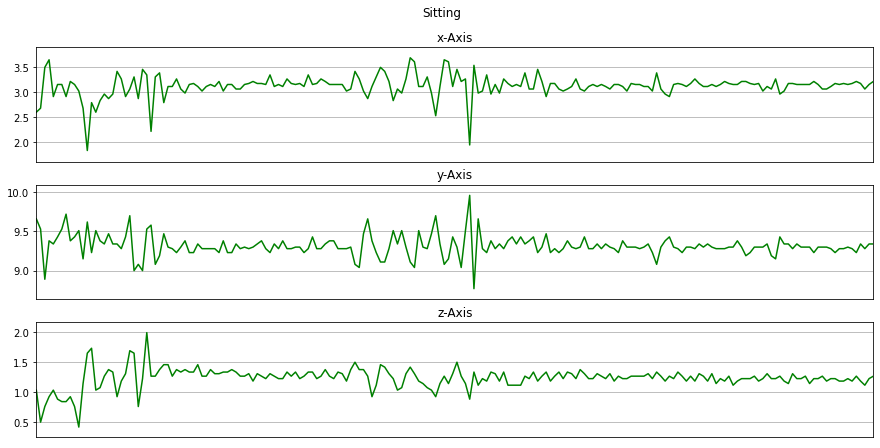

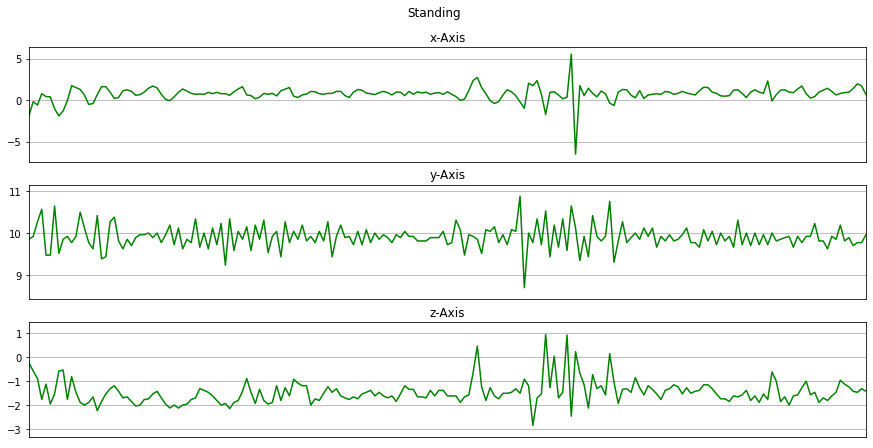

In [29]:
def plot_activity(activity, data):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows = 3, figsize = (15, 7), sharex = True)
    plot_axis(ax0, data['time'], data['x'], 'x-Axis')
    plot_axis(ax1, data['time'], data['y'], 'y-Axis')
    plot_axis(ax2, data['time'], data['z'], 'z-Axis')
    plt.subplots_adjust(hspace = 0.2)
    fig.suptitle(activity)
    plt.subplots_adjust(top=0.90)
    plt.show()

def plot_axis(ax, x, y, title):
    ax.plot(x, y, 'g')
    ax.set_title(title)
    ax.xaxis.set_visible(False)
    ax.set_ylim([min(y) - np.std(y), max(y) + np.std(y)])
    ax.set_xlim([min(x), max(x)])
    ax.grid(True)

for activity in activities:
    data_for_plot = data[(data['activity'] == activity)] [:Fs*10] 
    plot_activity(activity, data_for_plot)




In [30]:
df = data.drop(['user', 'time'], axis =1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [0]:
##balancing data

Walking = df[df['activity'] =='Walking'].head(3555).copy()
Jogging = df[df['activity'] =='Jogging'].head(3555).copy()
Upstairs = df[df['activity'] =='Upstairs'].head(3555).copy()
Downstairs = df[df['activity'] =='Downstairs'].head(3555).copy()
Standing = df[df['activity'] =='Standing'].head(3555).copy()
Sitting = df[df['activity'] =='Sitting'].head(3555).copy()

In [32]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Standing, Sitting ])
balanced_data.shape

(21330, 4)

In [33]:
balanced_data['activity'].value_counts()

Jogging       3555
Sitting       3555
Walking       3555
Upstairs      3555
Standing      3555
Downstairs    3555
Name: activity, dtype: int64

In [34]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [0]:
##lable encoder
from sklearn.preprocessing import LabelEncoder

In [36]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [37]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

In [0]:
##standardize data
x = balanced_data[['x', 'y', 'z']]
y = balanced_data['label']


In [39]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x =pd.DataFrame(data = x, columns = ['x', 'y', 'z'])
scaled_x['label'] = y.values

scaled_x

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-1.398532,-2.102562,1.969327,2
21326,-1.406581,-2.110366,1.957183,2
21327,-1.406581,-2.110366,1.969327,2
21328,-1.398532,-2.110366,1.957183,2


In [0]:
import scipy.stats as stats

In [0]:
##frames 
Fs = 20
frame_size = Fs*4
hop_size = Fs*2


In [0]:
def get_frames(df, frame_size, hop_size):
  N_FEATURES = 3
  frames = []
  lables = []
  for i in range (0, len(df) - frame_size, hop_size):
    x =df['x'].values[i: i+frame_size]
    y =df['y'].values[i: i+frame_size]
    z =df['z'].values[i: i+frame_size]

    label = stats.mode(df['label'][i: i + frame_size])[0][0]
    frames.append([x,y,z])
    lables.append(label)

  frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(lables)

  return frames, labels

In [0]:
x , y = get_frames(scaled_x, frame_size, hop_size)

In [44]:
x.shape, y.shape

((532, 80, 3), (532,))

In [0]:
x_train, x_test, y_train , y_test = train_test_split(x, y, test_size =0.2, random_state = 0, stratify = y)

In [46]:
x_train.shape, x_test.shape

((425, 80, 3), (107, 80, 3))

In [47]:
x_train[0].shape, x_test[0].shape

((80, 3), (80, 3))

3d data

In [0]:
x_train = x_train.reshape(425, 80, 3, 1)
x_test  = x_test.reshape(107, 80 ,3, 1)

In [49]:
x_train[0].shape, x_test[0].shape

((80, 3, 1), (80, 3, 1))

In [0]:
##2D CNN

In [0]:
model = Sequential()
model.add(Conv2D(16, (2,2), activation = 'relu', input_shape = x_train[0].shape))
model.add(Dropout(0.1))

model.add(Conv2D(32, (2,2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation = 'softmax'))


In [0]:
model.compile(optimizer=Adam(learning_rate=0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [53]:
history = model.fit(x_train, y_train, epochs = 10, validation_data= (x_test, y_test), verbose =1)

Epoch 1/10
14/14 [==============================] - 0s 22ms/step - loss: 1.6771 - accuracy: 0.2306 - val_loss: 1.4167 - val_accuracy: 0.3738
Epoch 2/10
14/14 [==============================] - 0s 9ms/step - loss: 1.2933 - accuracy: 0.5247 - val_loss: 0.9876 - val_accuracy: 0.8131
Epoch 3/10
14/14 [==============================] - 0s 10ms/step - loss: 0.8989 - accuracy: 0.7365 - val_loss: 0.5892 - val_accuracy: 0.8692
Epoch 4/10
14/14 [==============================] - 0s 10ms/step - loss: 0.6402 - accuracy: 0.8141 - val_loss: 0.4527 - val_accuracy: 0.8505
Epoch 5/10
14/14 [==============================] - 0s 10ms/step - loss: 0.4750 - accuracy: 0.8376 - val_loss: 0.3177 - val_accuracy: 0.9159
Epoch 6/10
14/14 [==============================] - 0s 10ms/step - loss: 0.3066 - accuracy: 0.9224 - val_loss: 0.2448 - val_accuracy: 0.8879
Epoch 7/10
14/14 [==============================] - 0s 10ms/step - loss: 0.3038 - accuracy: 0.8965 - val_loss: 0.2432 - val_accuracy: 0.9065
Epoch 8/10
14/

In [0]:
def plot_learningCurve(history, epoch):
  epoch_range = range(1,epoch+1)
  #plot Accuracy
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])

  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

  #plot loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])

  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train','Val'], loc='upper left')
  plt.show()

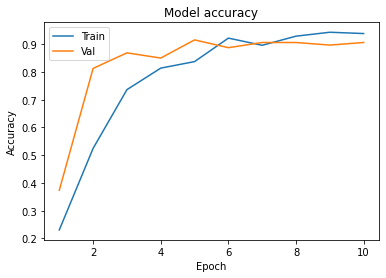

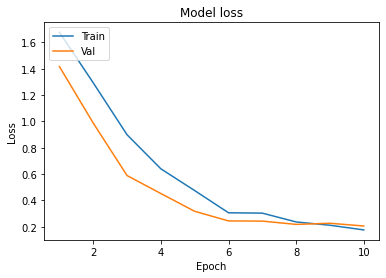

In [55]:
plot_learningCurve(history,10)

In [56]:
##confusion matrix 
import mlxtend                                                          

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import accuracy_score
print(mlxtend.__version__) 
#!pip install mlxtend --upgrade --no-deps


0.17.2


In [57]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [0]:
mat = confusion_matrix(y_test, y_pred)


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f52511ccd68>)

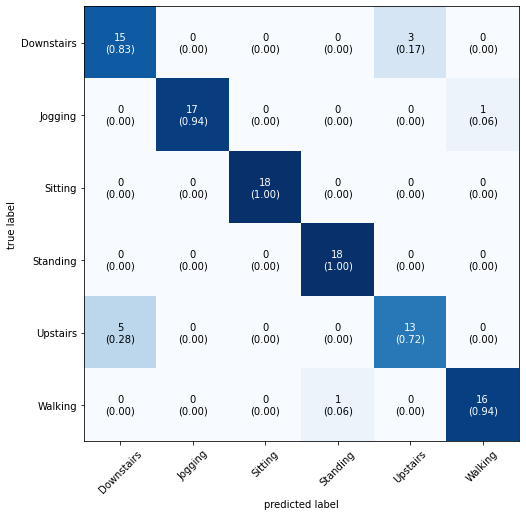

In [61]:
plot_confusion_matrix(conf_mat=mat, class_names=label.classes_, show_normed = True, figsize=(8,8)  )